In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 1000) 
pd. set_option('display.max_rows', 1000) 

In [3]:
df= pd.read_csv("TrainingData.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200739006,AL co,2019-05-25 00:00:00,2019.0,1.929265e+09,2019-05-07,20190506,20190507,20190522.0,USD,RV,1.0,NaN,13104.42,20190507.0,NAA8,1.929265e+09,0
1,CA02,140104409,LOB us,2019-05-13 00:00:00,2019.0,2.960544e+09,2019-04-26,20190426,20190426,20190514.0,CAD,RV,1.0,NaN,328854.36,20190504.0,CA10,2.960544e+09,0
2,U001,0100016691,BAY systems,NaN,2020.0,1.930661e+09,2020-03-17,20200317,20200317,20200416.0,USD,RV,1.0,NaN,15088.00,20200317.0,NAD5,1.930661e+09,1
3,U001,CCU013,KRAFT F llc,2019-11-27 00:00:00,2019.0,1.930078e+09,2019-10-31,20191031,20191031,20191031.0,USD,RV,1.0,NaN,15787.80,20191031.0,NAX2,1.930078e+09,0
4,U001,0200803720,DEC systems,2019-08-07 00:00:00,2019.0,1.929716e+09,2019-08-07,20190807,20190807,20190808.0,USD,RV,1.0,NaN,18137.94,20190801.0,NAM1,1.929716e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR trust,2019-03-07 00:00:00,2019.0,1.928850e+09,2019-02-25,20190224,20190225,20190312.0,USD,RV,1.0,NaN,1235.26,20190225.0,NAH4,1.928850e+09,0
49996,U001,200770567,LABAT corp,NaN,2020.0,1.930729e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,NaN,66517.95,20200401.0,NAA8,1.930729e+09,1
49997,U001,0200744019,TARG co,NaN,2020.0,1.930683e+09,2020-03-21,20200321,20200321,20200405.0,USD,RV,1.0,NaN,109574.24,20200321.0,NAA8,1.930683e+09,1
49998,U001,0200078795,H T H llc,2020-01-14 00:00:00,2020.0,1.930336e+09,2019-12-30,20191230,20191230,20200114.0,USD,RV,1.0,NaN,5051.81,20191230.0,NAA8,1.930336e+09,0


In [4]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [5]:
#Renaming
df.rename(columns={'document type':'document_type' ,'buisness_year':'business_year','document_create_date.1':'document_create_date1'},inplace=True)
df

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200739006,AL co,2019-05-25 00:00:00,2019.0,1.929265e+09,2019-05-07,20190506,20190507,20190522.0,USD,RV,1.0,NaN,13104.42,20190507.0,NAA8,1.929265e+09,0
1,CA02,140104409,LOB us,2019-05-13 00:00:00,2019.0,2.960544e+09,2019-04-26,20190426,20190426,20190514.0,CAD,RV,1.0,NaN,328854.36,20190504.0,CA10,2.960544e+09,0
2,U001,0100016691,BAY systems,NaN,2020.0,1.930661e+09,2020-03-17,20200317,20200317,20200416.0,USD,RV,1.0,NaN,15088.00,20200317.0,NAD5,1.930661e+09,1
3,U001,CCU013,KRAFT F llc,2019-11-27 00:00:00,2019.0,1.930078e+09,2019-10-31,20191031,20191031,20191031.0,USD,RV,1.0,NaN,15787.80,20191031.0,NAX2,1.930078e+09,0
4,U001,0200803720,DEC systems,2019-08-07 00:00:00,2019.0,1.929716e+09,2019-08-07,20190807,20190807,20190808.0,USD,RV,1.0,NaN,18137.94,20190801.0,NAM1,1.929716e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR trust,2019-03-07 00:00:00,2019.0,1.928850e+09,2019-02-25,20190224,20190225,20190312.0,USD,RV,1.0,NaN,1235.26,20190225.0,NAH4,1.928850e+09,0
49996,U001,200770567,LABAT corp,NaN,2020.0,1.930729e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,NaN,66517.95,20200401.0,NAA8,1.930729e+09,1
49997,U001,0200744019,TARG co,NaN,2020.0,1.930683e+09,2020-03-21,20200321,20200321,20200405.0,USD,RV,1.0,NaN,109574.24,20200321.0,NAA8,1.930683e+09,1
49998,U001,0200078795,H T H llc,2020-01-14 00:00:00,2020.0,1.930336e+09,2019-12-30,20191230,20191230,20200114.0,USD,RV,1.0,NaN,5051.81,20191230.0,NAA8,1.930336e+09,0


## REMOVING NULL VALUES

In [6]:
#Coverting to date format for creating target column
df['clear_date'] = pd.to_datetime(df['clear_date'])
df["due_in_date"]= pd.to_datetime(df.due_in_date,format='%Y%m%d')

In [7]:
## adding target column to df
df["target_clear_date"]=df["clear_date"] - df["due_in_date"]
df["target_clear_date"]=df["target_clear_date"]/np.timedelta64(1,"D")
df

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
0,U001,0200739006,AL co,2019-05-25,2019.0,1.929265e+09,2019-05-07,20190506,20190507,2019-05-22,USD,RV,1.0,NaN,13104.42,20190507.0,NAA8,1.929265e+09,0,3.0
1,CA02,140104409,LOB us,2019-05-13,2019.0,2.960544e+09,2019-04-26,20190426,20190426,2019-05-14,CAD,RV,1.0,NaN,328854.36,20190504.0,CA10,2.960544e+09,0,-1.0
2,U001,0100016691,BAY systems,NaT,2020.0,1.930661e+09,2020-03-17,20200317,20200317,2020-04-16,USD,RV,1.0,NaN,15088.00,20200317.0,NAD5,1.930661e+09,1,NaN
3,U001,CCU013,KRAFT F llc,2019-11-27,2019.0,1.930078e+09,2019-10-31,20191031,20191031,2019-10-31,USD,RV,1.0,NaN,15787.80,20191031.0,NAX2,1.930078e+09,0,27.0
4,U001,0200803720,DEC systems,2019-08-07,2019.0,1.929716e+09,2019-08-07,20190807,20190807,2019-08-08,USD,RV,1.0,NaN,18137.94,20190801.0,NAM1,1.929716e+09,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019.0,1.928850e+09,2019-02-25,20190224,20190225,2019-03-12,USD,RV,1.0,NaN,1235.26,20190225.0,NAH4,1.928850e+09,0,-5.0
49996,U001,200770567,LABAT corp,NaT,2020.0,1.930729e+09,2020-04-01,20200401,20200401,2020-04-16,USD,RV,1.0,NaN,66517.95,20200401.0,NAA8,1.930729e+09,1,NaN
49997,U001,0200744019,TARG co,NaT,2020.0,1.930683e+09,2020-03-21,20200321,20200321,2020-04-05,USD,RV,1.0,NaN,109574.24,20200321.0,NAA8,1.930683e+09,1,NaN
49998,U001,0200078795,H T H llc,2020-01-14,2020.0,1.930336e+09,2019-12-30,20191230,20191230,2020-01-14,USD,RV,1.0,NaN,5051.81,20191230.0,NAA8,1.930336e+09,0,0.0


## DATA PREPROCESSING

#### NULL IMPULTATION

In [8]:
comparison_column = np.where(df["doc_id"] == df["invoice_id"], True, False)
comparison_column

array([ True,  True,  True, ...,  True,  True,  True])

In [9]:
df[["doc_id",'invoice_id']].corr()

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


In [10]:
df.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date               10000
business_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date1        0
due_in_date                  0
invoice_currency             0
document_type                0
posting_id                   0
area_business            50000
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   8
isOpen                       0
target_clear_date        10000
dtype: int64

In [11]:
main_train = df[df.clear_date.isnull()==False]
main_test =  df[df.clear_date.isnull()==True]

In [12]:
main_train.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                   0
business_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date1        0
due_in_date                  0
invoice_currency             0
document_type                0
posting_id                   0
area_business            40000
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   8
isOpen                       0
target_clear_date            0
dtype: int64

In [13]:
main_train

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
0,U001,0200739006,AL co,2019-05-25,2019.0,1.929265e+09,2019-05-07,20190506,20190507,2019-05-22,USD,RV,1.0,NaN,13104.42,20190507.0,NAA8,1.929265e+09,0,3.0
1,CA02,140104409,LOB us,2019-05-13,2019.0,2.960544e+09,2019-04-26,20190426,20190426,2019-05-14,CAD,RV,1.0,NaN,328854.36,20190504.0,CA10,2.960544e+09,0,-1.0
3,U001,CCU013,KRAFT F llc,2019-11-27,2019.0,1.930078e+09,2019-10-31,20191031,20191031,2019-10-31,USD,RV,1.0,NaN,15787.80,20191031.0,NAX2,1.930078e+09,0,27.0
4,U001,0200803720,DEC systems,2019-08-07,2019.0,1.929716e+09,2019-08-07,20190807,20190807,2019-08-08,USD,RV,1.0,NaN,18137.94,20190801.0,NAM1,1.929716e+09,0,-1.0
5,U001,0200609331,KROG corp,2019-12-10,2019.0,1.930193e+09,2019-11-25,20191125,20191125,2019-12-10,USD,RV,1.0,NaN,15892.30,20191125.0,NAA8,1.930193e+09,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200772595,SAFEW us,2019-11-13,2019.0,1.930056e+09,2019-10-29,20191027,20191029,2019-11-13,USD,RV,1.0,NaN,15881.39,20191029.0,NAA8,1.930056e+09,0,0.0
49994,CA02,0140104508,BULK us,2019-09-18,2019.0,2.960576e+09,2019-08-28,20190828,20190828,2019-09-08,CAD,RV,1.0,NaN,22475.70,20190829.0,CA10,2.960576e+09,0,10.0
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019.0,1.928850e+09,2019-02-25,20190224,20190225,2019-03-12,USD,RV,1.0,NaN,1235.26,20190225.0,NAH4,1.928850e+09,0,-5.0
49998,U001,0200078795,H T H llc,2020-01-14,2020.0,1.930336e+09,2019-12-30,20191230,20191230,2020-01-14,USD,RV,1.0,NaN,5051.81,20191230.0,NAA8,1.930336e+09,0,0.0


In [14]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          40000 non-null  object        
 1   cust_number            40000 non-null  object        
 2   name_customer          40000 non-null  object        
 3   clear_date             40000 non-null  datetime64[ns]
 4   business_year          40000 non-null  float64       
 5   doc_id                 40000 non-null  float64       
 6   posting_date           40000 non-null  object        
 7   document_create_date   40000 non-null  int64         
 8   document_create_date1  40000 non-null  int64         
 9   due_in_date            40000 non-null  datetime64[ns]
 10  invoice_currency       40000 non-null  object        
 11  document_type          40000 non-null  object        
 12  posting_id             40000 non-null  float64       
 13  a

In [15]:
main_train["doc_id"]=main_train.doc_id.astype(int)
main_train["business_year"]=main_train.business_year.astype(int)

In [16]:
#since we have null values in area business
main_train.drop("area_business",axis=1,inplace=True)

In [17]:
#since our doc and invoice id is same we will drop it
main_train.drop("invoice_id",axis=1,inplace=True)

In [18]:
main_train

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_clear_date
0,U001,0200739006,AL co,2019-05-25,2019,1929264873,2019-05-07,20190506,20190507,2019-05-22,USD,RV,1.0,13104.42,20190507.0,NAA8,0,3.0
1,CA02,140104409,LOB us,2019-05-13,2019,-2147483648,2019-04-26,20190426,20190426,2019-05-14,CAD,RV,1.0,328854.36,20190504.0,CA10,0,-1.0
3,U001,CCU013,KRAFT F llc,2019-11-27,2019,1930078129,2019-10-31,20191031,20191031,2019-10-31,USD,RV,1.0,15787.80,20191031.0,NAX2,0,27.0
4,U001,0200803720,DEC systems,2019-08-07,2019,1929716335,2019-08-07,20190807,20190807,2019-08-08,USD,RV,1.0,18137.94,20190801.0,NAM1,0,-1.0
5,U001,0200609331,KROG corp,2019-12-10,2019,1930193011,2019-11-25,20191125,20191125,2019-12-10,USD,RV,1.0,15892.30,20191125.0,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200772595,SAFEW us,2019-11-13,2019,1930056336,2019-10-29,20191027,20191029,2019-11-13,USD,RV,1.0,15881.39,20191029.0,NAA8,0,0.0
49994,CA02,0140104508,BULK us,2019-09-18,2019,-2147483648,2019-08-28,20190828,20190828,2019-09-08,CAD,RV,1.0,22475.70,20190829.0,CA10,0,10.0
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019,1928850081,2019-02-25,20190224,20190225,2019-03-12,USD,RV,1.0,1235.26,20190225.0,NAH4,0,-5.0
49998,U001,0200078795,H T H llc,2020-01-14,2020,1930336237,2019-12-30,20191230,20191230,2020-01-14,USD,RV,1.0,5051.81,20191230.0,NAA8,0,0.0


In [19]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          40000 non-null  object        
 1   cust_number            40000 non-null  object        
 2   name_customer          40000 non-null  object        
 3   clear_date             40000 non-null  datetime64[ns]
 4   business_year          40000 non-null  int32         
 5   doc_id                 40000 non-null  int32         
 6   posting_date           40000 non-null  object        
 7   document_create_date   40000 non-null  int64         
 8   document_create_date1  40000 non-null  int64         
 9   due_in_date            40000 non-null  datetime64[ns]
 10  invoice_currency       40000 non-null  object        
 11  document_type          40000 non-null  object        
 12  posting_id             40000 non-null  float64       
 13  t

In [20]:
#DATE TO TIME
main_train['clear_date'] = pd.to_datetime(main_train['clear_date'])

In [21]:
main_train["posting_date"]= pd.to_datetime(main_train["posting_date"])
main_train["document_create_date"]= pd.to_datetime(main_train.document_create_date,format='%Y%m%d')
main_train["baseline_create_date"]= pd.to_datetime(main_train.baseline_create_date,format='%Y%m%d')
main_train["due_in_date"]= pd.to_datetime(main_train.due_in_date,format='%Y%m%d')
main_train["document_create_date1"]= pd.to_datetime(main_train.document_create_date1,format='%Y%m%d')

In [22]:
main_train["document_create_date1"]= pd.to_datetime(main_train.document_create_date1,format='%Y%m%d')

In [23]:
main_train

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_clear_date
0,U001,0200739006,AL co,2019-05-25,2019,1929264873,2019-05-07,2019-05-06,2019-05-07,2019-05-22,USD,RV,1.0,13104.42,2019-05-07,NAA8,0,3.0
1,CA02,140104409,LOB us,2019-05-13,2019,-2147483648,2019-04-26,2019-04-26,2019-04-26,2019-05-14,CAD,RV,1.0,328854.36,2019-05-04,CA10,0,-1.0
3,U001,CCU013,KRAFT F llc,2019-11-27,2019,1930078129,2019-10-31,2019-10-31,2019-10-31,2019-10-31,USD,RV,1.0,15787.80,2019-10-31,NAX2,0,27.0
4,U001,0200803720,DEC systems,2019-08-07,2019,1929716335,2019-08-07,2019-08-07,2019-08-07,2019-08-08,USD,RV,1.0,18137.94,2019-08-01,NAM1,0,-1.0
5,U001,0200609331,KROG corp,2019-12-10,2019,1930193011,2019-11-25,2019-11-25,2019-11-25,2019-12-10,USD,RV,1.0,15892.30,2019-11-25,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200772595,SAFEW us,2019-11-13,2019,1930056336,2019-10-29,2019-10-27,2019-10-29,2019-11-13,USD,RV,1.0,15881.39,2019-10-29,NAA8,0,0.0
49994,CA02,0140104508,BULK us,2019-09-18,2019,-2147483648,2019-08-28,2019-08-28,2019-08-28,2019-09-08,CAD,RV,1.0,22475.70,2019-08-29,CA10,0,10.0
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019,1928850081,2019-02-25,2019-02-24,2019-02-25,2019-03-12,USD,RV,1.0,1235.26,2019-02-25,NAH4,0,-5.0
49998,U001,0200078795,H T H llc,2020-01-14,2020,1930336237,2019-12-30,2019-12-30,2019-12-30,2020-01-14,USD,RV,1.0,5051.81,2019-12-30,NAA8,0,0.0


## DUPLICATE AND CONSTANT COLUMN REMOVAL

In [24]:
comparison_column = np.where(main_train["posting_date"] == main_train["document_create_date1"], True, False)
comparison_column

array([ True,  True,  True, ...,  True,  True,  True])

In [25]:
#elminate document create date 1
main_train.drop("document_create_date1",axis=1,inplace=True)

In [26]:
main_train.business_code.value_counts()

U001    36223
CA02     3110
U013      515
U002      133
U005       16
U007        3
Name: business_code, dtype: int64

In [27]:
main_train["business_code"]= np.where(main_train["business_code"].isin(["U005","U007","U002"]),"Others",main_train["business_code"])

In [28]:
main_train.business_code.value_counts()

U001      36223
CA02       3110
U013        515
Others      152
Name: business_code, dtype: int64

In [29]:
# condition:we have to sort according to posting dates
main_train.sort_values(by=["posting_date"])

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_clear_date
4989,U001,0200769623,WAL-MAR associates,2019-01-09,2019,1928541516,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,9336.92,2018-12-30,NAH4,0,-5.0
24783,U001,0200769623,WAL-MAR llc,2019-01-09,2019,1928540718,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,6811.55,2018-12-30,NAH4,0,-5.0
25311,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1928542468,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41564.45,2018-12-30,NAH4,0,-5.0
23074,U001,0200769623,WAL-MAR llc,2019-01-11,2019,1928542340,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,10357.32,2018-12-30,NAH4,0,-3.0
33109,U001,0200762301,C&S WH,2019-01-15,2019,1928539706,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,21119.80,2018-12-30,NAC6,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,U001,0200769623,WAL-MAR us,2020-03-13,2020,1930559139,2020-02-26,2020-02-22,2020-03-12,USD,RV,1.0,9122.21,2020-02-26,NAH4,0,1.0
23314,U001,0200900909,SYSCO foundation,2020-03-16,2020,1930576520,2020-02-26,2020-02-27,2020-03-12,USD,RV,1.0,2745.71,2020-02-26,NAA8,0,4.0
2738,U001,0200700919,US co,2020-03-20,2020,1930580323,2020-02-27,2020-02-27,2020-03-18,USD,RV,1.0,90195.02,2020-02-27,NAD1,0,2.0
10157,U001,0200794332,COST trust,2020-03-12,2020,1930573842,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,10990.81,2020-02-27,NAAX,0,-1.0


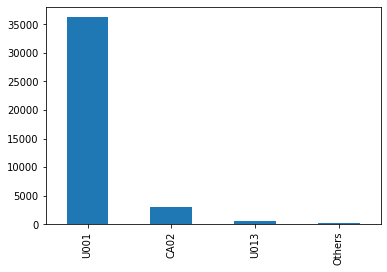

In [30]:
main_train['business_code'].value_counts().plot(kind='bar')
plt.show()

In [31]:
main_train.isOpen.value_counts()

0    40000
Name: isOpen, dtype: int64

In [32]:
main_train.drop("isOpen",inplace=True,axis=1)

In [33]:
main_train

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,target_clear_date
0,U001,0200739006,AL co,2019-05-25,2019,1929264873,2019-05-07,2019-05-06,2019-05-22,USD,RV,1.0,13104.42,2019-05-07,NAA8,3.0
1,CA02,140104409,LOB us,2019-05-13,2019,-2147483648,2019-04-26,2019-04-26,2019-05-14,CAD,RV,1.0,328854.36,2019-05-04,CA10,-1.0
3,U001,CCU013,KRAFT F llc,2019-11-27,2019,1930078129,2019-10-31,2019-10-31,2019-10-31,USD,RV,1.0,15787.80,2019-10-31,NAX2,27.0
4,U001,0200803720,DEC systems,2019-08-07,2019,1929716335,2019-08-07,2019-08-07,2019-08-08,USD,RV,1.0,18137.94,2019-08-01,NAM1,-1.0
5,U001,0200609331,KROG corp,2019-12-10,2019,1930193011,2019-11-25,2019-11-25,2019-12-10,USD,RV,1.0,15892.30,2019-11-25,NAA8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200772595,SAFEW us,2019-11-13,2019,1930056336,2019-10-29,2019-10-27,2019-11-13,USD,RV,1.0,15881.39,2019-10-29,NAA8,0.0
49994,CA02,0140104508,BULK us,2019-09-18,2019,-2147483648,2019-08-28,2019-08-28,2019-09-08,CAD,RV,1.0,22475.70,2019-08-29,CA10,10.0
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019,1928850081,2019-02-25,2019-02-24,2019-03-12,USD,RV,1.0,1235.26,2019-02-25,NAH4,-5.0
49998,U001,0200078795,H T H llc,2020-01-14,2020,1930336237,2019-12-30,2019-12-30,2020-01-14,USD,RV,1.0,5051.81,2019-12-30,NAA8,0.0


Text(0, 0.5, 'Number of customers')

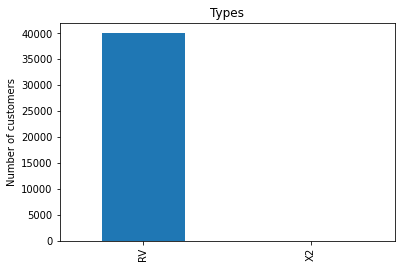

In [34]:
fig = main_train["document_type"].value_counts().plot.bar()
fig.set_title("Types")
fig.set_ylabel("Number of customers")

In [35]:
#since we have RV values we can remove posting id main_train.drop
main_train.drop("document_type",axis=1,inplace=True)

Text(0, 0.5, 'number of customer')

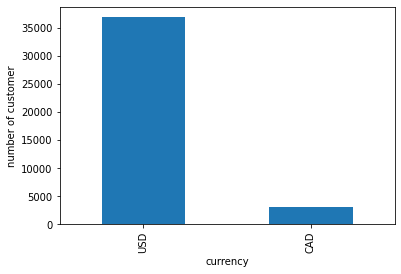

In [36]:
fig = main_train["invoice_currency"].value_counts().plot.bar()
plt.xlabel("currency")
plt.ylabel("number of customer")

In [37]:
# IN BUSINESS CODE U STANDS FOR USD AND C FOR CAD remove invoice currency
main_train.drop("invoice_currency",axis=1,inplace=True)

In [38]:
main_train

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,due_in_date,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,target_clear_date
0,U001,0200739006,AL co,2019-05-25,2019,1929264873,2019-05-07,2019-05-06,2019-05-22,1.0,13104.42,2019-05-07,NAA8,3.0
1,CA02,140104409,LOB us,2019-05-13,2019,-2147483648,2019-04-26,2019-04-26,2019-05-14,1.0,328854.36,2019-05-04,CA10,-1.0
3,U001,CCU013,KRAFT F llc,2019-11-27,2019,1930078129,2019-10-31,2019-10-31,2019-10-31,1.0,15787.80,2019-10-31,NAX2,27.0
4,U001,0200803720,DEC systems,2019-08-07,2019,1929716335,2019-08-07,2019-08-07,2019-08-08,1.0,18137.94,2019-08-01,NAM1,-1.0
5,U001,0200609331,KROG corp,2019-12-10,2019,1930193011,2019-11-25,2019-11-25,2019-12-10,1.0,15892.30,2019-11-25,NAA8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200772595,SAFEW us,2019-11-13,2019,1930056336,2019-10-29,2019-10-27,2019-11-13,1.0,15881.39,2019-10-29,NAA8,0.0
49994,CA02,0140104508,BULK us,2019-09-18,2019,-2147483648,2019-08-28,2019-08-28,2019-09-08,1.0,22475.70,2019-08-29,CA10,10.0
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019,1928850081,2019-02-25,2019-02-24,2019-03-12,1.0,1235.26,2019-02-25,NAH4,-5.0
49998,U001,0200078795,H T H llc,2020-01-14,2020,1930336237,2019-12-30,2019-12-30,2020-01-14,1.0,5051.81,2019-12-30,NAA8,0.0


In [39]:
main_train.drop("posting_id",axis=1,inplace=True)

In [40]:
main_train

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,target_clear_date
0,U001,0200739006,AL co,2019-05-25,2019,1929264873,2019-05-07,2019-05-06,2019-05-22,13104.42,2019-05-07,NAA8,3.0
1,CA02,140104409,LOB us,2019-05-13,2019,-2147483648,2019-04-26,2019-04-26,2019-05-14,328854.36,2019-05-04,CA10,-1.0
3,U001,CCU013,KRAFT F llc,2019-11-27,2019,1930078129,2019-10-31,2019-10-31,2019-10-31,15787.80,2019-10-31,NAX2,27.0
4,U001,0200803720,DEC systems,2019-08-07,2019,1929716335,2019-08-07,2019-08-07,2019-08-08,18137.94,2019-08-01,NAM1,-1.0
5,U001,0200609331,KROG corp,2019-12-10,2019,1930193011,2019-11-25,2019-11-25,2019-12-10,15892.30,2019-11-25,NAA8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200772595,SAFEW us,2019-11-13,2019,1930056336,2019-10-29,2019-10-27,2019-11-13,15881.39,2019-10-29,NAA8,0.0
49994,CA02,0140104508,BULK us,2019-09-18,2019,-2147483648,2019-08-28,2019-08-28,2019-09-08,22475.70,2019-08-29,CA10,10.0
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019,1928850081,2019-02-25,2019-02-24,2019-03-12,1235.26,2019-02-25,NAH4,-5.0
49998,U001,0200078795,H T H llc,2020-01-14,2020,1930336237,2019-12-30,2019-12-30,2020-01-14,5051.81,2019-12-30,NAA8,0.0


In [41]:
main_train.corr(method='pearson')

,business_year,doc_id,total_open_amount,target_clear_date
business_year,1.000000,0.009537,-0.006672,-0.001514
doc_id,0.009537,1.000000,-0.181056,-0.132636
total_open_amount,-0.006672,-0.181056,1.000000,0.010522
target_clear_date,-0.001514,-0.132636,0.010522,1.000000


## SPLIT VALUE

In [42]:
#split_data
x= main_train.drop(["target_clear_date"],axis=1)
x

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200739006,AL co,2019-05-25,2019,1929264873,2019-05-07,2019-05-06,2019-05-22,13104.42,2019-05-07,NAA8
1,CA02,140104409,LOB us,2019-05-13,2019,-2147483648,2019-04-26,2019-04-26,2019-05-14,328854.36,2019-05-04,CA10
3,U001,CCU013,KRAFT F llc,2019-11-27,2019,1930078129,2019-10-31,2019-10-31,2019-10-31,15787.80,2019-10-31,NAX2
4,U001,0200803720,DEC systems,2019-08-07,2019,1929716335,2019-08-07,2019-08-07,2019-08-08,18137.94,2019-08-01,NAM1
5,U001,0200609331,KROG corp,2019-12-10,2019,1930193011,2019-11-25,2019-11-25,2019-12-10,15892.30,2019-11-25,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200772595,SAFEW us,2019-11-13,2019,1930056336,2019-10-29,2019-10-27,2019-11-13,15881.39,2019-10-29,NAA8
49994,CA02,0140104508,BULK us,2019-09-18,2019,-2147483648,2019-08-28,2019-08-28,2019-09-08,22475.70,2019-08-29,CA10
49995,U001,0200769623,WAL-MAR trust,2019-03-07,2019,1928850081,2019-02-25,2019-02-24,2019-03-12,1235.26,2019-02-25,NAH4
49998,U001,0200078795,H T H llc,2020-01-14,2020,1930336237,2019-12-30,2019-12-30,2020-01-14,5051.81,2019-12-30,NAA8


In [43]:
y=main_train["target_clear_date"]

In [44]:
x_train,x_inter_test,y_train,y_inter_test=train_test_split(x,y,test_size=0.3,random_state=0,shuffle=False)

In [45]:
x_train.shape,x_inter_test.shape

((28000, 12), (12000, 12))

In [46]:
x_val,x_test,y_val,y_test = train_test_split(x_inter_test,y_inter_test,test_size=0.4,random_state=0,shuffle=False)

In [47]:
x_train.shape ,x_val.shape ,x_test.shape

((28000, 12), (7200, 12), (4800, 12))

## EDA

<AxesSubplot:xlabel='target_clear_date', ylabel='Density'>

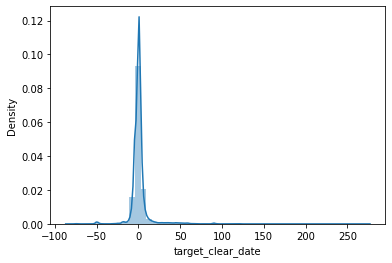

In [48]:
sns.distplot(y_train)

<AxesSubplot:xlabel='target_clear_date', ylabel='Count'>

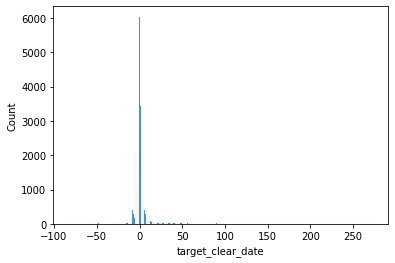

In [49]:
sns.histplot(y_train)

In [50]:
x_train.merge(y_train,on = x_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,target_clear_date
0,0,U001,0200739006,AL co,2019-05-25,2019,1929264873,2019-05-07,2019-05-06,2019-05-22,13104.42,2019-05-07,NAA8,3.0
1,1,CA02,140104409,LOB us,2019-05-13,2019,-2147483648,2019-04-26,2019-04-26,2019-05-14,328854.36,2019-05-04,CA10,-1.0
2,3,U001,CCU013,KRAFT F llc,2019-11-27,2019,1930078129,2019-10-31,2019-10-31,2019-10-31,15787.80,2019-10-31,NAX2,27.0
3,4,U001,0200803720,DEC systems,2019-08-07,2019,1929716335,2019-08-07,2019-08-07,2019-08-08,18137.94,2019-08-01,NAM1,-1.0
4,5,U001,0200609331,KROG corp,2019-12-10,2019,1930193011,2019-11-25,2019-11-25,2019-12-10,15892.30,2019-11-25,NAA8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,34973,U001,0200759082,INGL corp,2019-01-18,2019,1928551776,2019-01-02,2019-01-02,2019-01-17,53815.71,2019-01-02,NAA8,1.0
27996,34974,U001,0200707822,PUBLI in,2019-06-05,2019,1929352105,2019-05-21,2019-05-20,2019-06-05,130047.33,2019-05-21,NAA8,0.0
27997,34976,U001,0100031704,DELHAIZE corporation,2019-10-25,2019,1929990810,2019-10-09,2019-10-09,2019-10-24,101006.83,2019-10-09,NAA8,1.0
27998,34977,U001,0200769623,WAL-MAR systems,2020-01-28,2020,1930406378,2020-01-18,2020-01-16,2020-02-02,3340.21,2020-01-18,NAH4,-5.0


<AxesSubplot:xlabel='target_clear_date', ylabel='clear_date'>

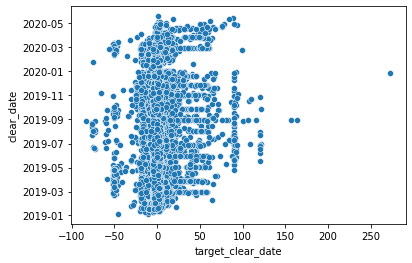

In [51]:
sns.scatterplot(data = x_train.merge(y_train,on=x_train.index), x = "target_clear_date" , y = "clear_date")

<AxesSubplot:xlabel='target_clear_date', ylabel='total_open_amount'>

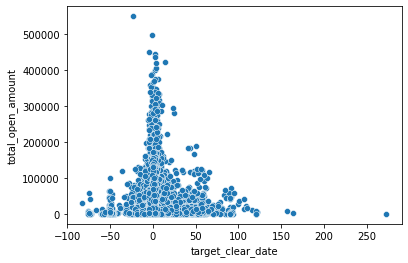

In [52]:
sns.scatterplot(data = x_train.merge(y_train,on=x_train.index), x = "target_clear_date" , y = "total_open_amount")

### FEATURE ENGINEERING

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
name_customer_enc = LabelEncoder()
name_customer_enc.fit(x_train["name_customer"])
x_train["name_customer_enc"]=name_customer_enc.transform(x_train["name_customer"])

In [55]:
name_customer_enc.fit(x_test["name_customer"])
x_test["name_customer_enc"]=name_customer_enc.transform(x_test["name_customer"])

In [56]:
name_customer_enc.fit(x_val["name_customer"])
x_val["name_customer_enc"]=name_customer_enc.transform(x_val["name_customer"])

In [57]:
#dropping the values of name customer in train,val and test
x_train.drop(["name_customer"],inplace=True,axis=1)
x_val.drop(["name_customer"],inplace=True,axis=1)
x_test.drop(["name_customer"],inplace=True,axis=1)

In [58]:

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34978
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         28000 non-null  object        
 1   cust_number           28000 non-null  object        
 2   clear_date            28000 non-null  datetime64[ns]
 3   business_year         28000 non-null  int32         
 4   doc_id                28000 non-null  int32         
 5   posting_date          28000 non-null  datetime64[ns]
 6   document_create_date  28000 non-null  datetime64[ns]
 7   due_in_date           28000 non-null  datetime64[ns]
 8   total_open_amount     28000 non-null  float64       
 9   baseline_create_date  28000 non-null  datetime64[ns]
 10  cust_payment_terms    28000 non-null  object        
 11  name_customer_enc     28000 non-null  int32         
dtypes: datetime64[ns](5), float64(1), int32(3), object(3)
memory usage: 2.5+ M

In [59]:

def shot(col , traindf = x_train,valdf =x_val,testdf =x_test):
    traindf.drop(col,inplace=True,axis=1)
    valdf.drop(col,inplace=True,axis=1)
    testdf.drop(col,inplace=True,axis=1)
    return traindf,valdf,testdf

In [60]:
##changing  date to seperate column 
x_train["year_posting_date"]= x_train["posting_date"].dt.year
x_val["year_posting_date"]= x_val["posting_date"].dt.year
x_test["week_posting_date"]= x_test["posting_date"].dt.year

x_train["day_posting_date"]= x_train["posting_date"].dt.day
x_val["day_posting_day"]= x_val["posting_date"].dt.day
x_test["day_posting_day"]= x_test["posting_date"].dt.day

x_train["month_posting_date"]= x_train["posting_date"].dt.month
x_val["month_posting_date"]= x_val["posting_date"].dt.month
x_test["month_posting_date"]= x_test["posting_date"].dt.month

In [61]:
x_train,x_val,x_test = shot(["posting_date"])

In [62]:
x_train["year_due_in_date"]= x_train["due_in_date"].dt.year
x_val["year_due_in_date"]= x_val["due_in_date"].dt.year
x_test["year_due_in_date"]= x_test["due_in_date"].dt.year

x_train["day_due_in_date"]= x_train["due_in_date"].dt.day
x_val["day_due_in_date"]= x_val["due_in_date"].dt.day
x_test["day_due_in_date"]= x_test["due_in_date"].dt.day

x_train["month_due_in_date"]= x_train["due_in_date"].dt.month
x_val["month_due_in_date"]= x_val["due_in_date"].dt.month
x_test["month_due_in_date"]= x_test["due_in_date"].dt.month

In [63]:
x_train,x_val,x_test = shot(["due_in_date"])

In [64]:
x_train["year_document_create_date"]= x_train["document_create_date"].dt.year
x_val["year_document_create_date"]= x_val["document_create_date"].dt.year
x_test["year_document_create_date"]= x_test["document_create_date"].dt.year

x_train["day_document_create_date"]= x_train["document_create_date"].dt.day
x_val["day_document_create_date"]= x_val["document_create_date"].dt.day
x_test["day_document_create_date"]= x_test["document_create_date"].dt.day

x_train["month_document_create_date"]= x_train["document_create_date"].dt.month
x_val["month_document_create_date"]= x_val["document_create_date"].dt.month
x_test["month_document_create_date"]= x_test["document_create_date"].dt.month

In [65]:
x_train,x_val,x_test = shot(["document_create_date"])

In [66]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(x_train["cust_payment_terms"])
x_train["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(x_train["cust_payment_terms"])

In [67]:
cust_payment_terms_enc.fit(x_val["cust_payment_terms"])
x_val["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(x_val["cust_payment_terms"])
cust_payment_terms_enc.fit(x_test["cust_payment_terms"])
x_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(x_test["cust_payment_terms"])

In [68]:
x_train,x_val,x_test = shot(["cust_payment_terms"])

In [69]:
### splitting mixed column to numericals INT

In [70]:
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [71]:
x_train[mixed_num_in_cust_num]=x_train[mixed_cust_num].str.extract('(\d+)')

In [72]:
x_train[mixed_label_in_cust_num]=x_train[mixed_cust_num].str[:3]


In [73]:
x_train["cust_number_numerical"]=x_train.cust_number_numerical.astype(int)

In [74]:
x_val[mixed_num_in_cust_num]=x_val[mixed_cust_num].str.extract('(\d+)')
x_val[mixed_label_in_cust_num]=x_val[mixed_cust_num].str[:3]
x_val["cust_number_numerical"]=x_val.cust_number_numerical.astype(int)

x_test[mixed_num_in_cust_num]=x_test[mixed_cust_num].str.extract('(\d+)')
x_test[mixed_label_in_cust_num]=x_test[mixed_cust_num].str[:3]
x_test["cust_number_numerical"]=x_test.cust_number_numerical.astype(int)

In [75]:
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(x_train["cust_number_label"])
x_train["cust_number_label_enc"]=cust_number_label_enc.transform(x_train["cust_number_label"])

In [76]:
cust_number_label_enc.fit(x_val["cust_number_label"])
x_val["cust_number_label_enc"]=cust_number_label_enc.transform(x_val["cust_number_label"])
cust_number_label_enc.fit(x_test["cust_number_label"])
x_test["cust_number_label_enc"]=cust_number_label_enc.transform(x_test["cust_number_label"])

In [77]:
x_train,x_val,x_test = shot(["cust_number"])
x_train,x_val,x_test = shot(["cust_number_label"])

In [78]:

business_code_enc = LabelEncoder()
business_code_enc.fit(x_train["business_code"])
x_train["business_code_enc"]=business_code_enc.transform(x_train["business_code"])

business_code_enc.fit(x_val["business_code"])
x_val["business_code_enc"]=business_code_enc.transform(x_val["business_code"])

business_code_enc.fit(x_test["business_code"])
x_test["business_code_enc"]=business_code_enc.transform(x_test["business_code"])

In [79]:
x_train,x_val,x_test = shot(["business_code"])

In [80]:
x_train["year_baseline_create_date"]= x_train["baseline_create_date"].dt.year
x_val["year_baseline_create_date"]= x_val["baseline_create_date"].dt.year
x_test["year_baseline_create_date"]= x_test["baseline_create_date"].dt.year

x_train["day_baseline_create_date"]= x_train["baseline_create_date"].dt.day
x_val["day_baseline_create_date"]= x_val["baseline_create_date"].dt.day
x_test["day_baseline_create_date"]= x_test["baseline_create_date"].dt.day

x_train["month_baseline_create_date"]=x_train["baseline_create_date"].dt.month
x_val["month_baseline_create_date"]= x_val["baseline_create_date"].dt.month
x_test["month_baseline_create_date"]= x_test["baseline_create_date"].dt.month

In [81]:
x_train,x_val,x_test = shot(["baseline_create_date"])

In [82]:
x_train["year_clear_date"]= x_train["clear_date"].dt.year
x_val["year_clear_date"]= x_val["clear_date"].dt.year
x_test["year_clear_date"]= x_test["clear_date"].dt.year

x_train["day_clear_date"]= x_train["clear_date"].dt.day
x_val["day_clear_date"]= x_val["clear_date"].dt.day
x_test["day_clear_date"]= x_test["clear_date"].dt.day

x_train["month_clear_date"]=x_train["clear_date"].dt.month
x_val["month_clear_date"]= x_val["clear_date"].dt.month
x_test["month_clear_date"]= x_test["clear_date"].dt.month

In [83]:
x_train,x_val,x_test = shot(["clear_date"])

## FEATURE SELECTION

In [84]:
x_train.merge(y_train,on=x_train.index).corr()

,key_0,business_year,doc_id,total_open_amount,name_customer_enc,year_posting_date,day_posting_date,month_posting_date,year_due_in_date,day_due_in_date,month_due_in_date,year_document_create_date,day_document_create_date,month_document_create_date,cust_payment_terms_enc,cust_number_numerical,cust_number_label_enc,business_code_enc,year_baseline_create_date,day_baseline_create_date,month_baseline_create_date,year_clear_date,day_clear_date,month_clear_date,target_clear_date
key_0,1.000000,-0.001412,-0.007787,0.005548,-0.003775,-0.000952,-0.002963,-0.005149,-0.003793,-0.005595,-0.000905,-0.001050,-0.002845,-0.005077,-0.007121,-0.006555,0.001077,-0.009506,-0.001278,-0.000742,-0.004873,-0.001412,-0.005631,-0.002788,0.009253
business_year,-0.001412,1.000000,0.005705,-0.012231,-0.007518,0.964498,0.013206,-0.432022,0.982545,-0.002406,-0.469720,0.949898,0.010157,-0.416947,-0.000944,-0.004437,-0.024883,0.005831,0.966072,0.005888,-0.435226,1.000000,0.014591,-0.476483,0.001315
doc_id,-0.007787,0.005705,1.000000,-0.180083,0.013504,0.005435,0.001385,-0.012005,0.007550,0.005747,-0.005212,0.002468,-0.003507,-0.010588,0.476928,0.329252,0.169602,0.973575,0.000199,-0.009183,-0.013739,0.005705,-0.007792,-0.014694,-0.126688
total_open_amount,0.005548,-0.012231,-0.180083,1.000000,-0.024123,-0.011858,0.010197,0.037083,-0.013255,-0.010990,0.034064,-0.009847,0.016379,0.035739,-0.198822,-0.019366,-0.078028,-0.179760,-0.011070,0.027175,0.037692,-0.012231,0.001238,0.032826,0.012167
name_customer_enc,-0.003775,-0.007518,0.013504,-0.024123,1.000000,-0.007448,-0.006814,0.004425,-0.007613,-0.000369,-0.001500,-0.008477,-0.005638,0.004909,0.115239,0.120667,-0.019305,0.002815,-0.006801,0.025544,0.003465,-0.007518,0.014250,-0.005185,-0.021550
year_posting_date,-0.000952,0.964498,0.005435,-0.011858,-0.007448,1.000000,-0.026973,-0.475904,0.948337,0.002332,-0.435338,0.983498,-0.026847,-0.458968,0.001910,-0.006357,-0.022973,0.005369,0.996593,-0.029623,-0.473803,0.964498,0.020618,-0.441242,0.001513
day_posting_date,-0.002963,0.013206,0.001385,0.010197,-0.006814,-0.026973,1.000000,-0.037156,0.016215,-0.372878,0.024854,-0.010119,0.837290,-0.043893,0.000064,-0.006568,-0.011527,0.001964,-0.023775,0.951060,-0.037622,0.013206,-0.349412,0.026920,-0.003693
month_posting_date,-0.005149,-0.432022,-0.012005,0.037083,0.004425,-0.475904,-0.037156,1.000000,-0.406753,0.040434,0.920972,-0.459209,-0.031477,0.980236,-0.007014,0.012790,-0.044279,-0.014540,-0.471408,-0.033547,0.995973,-0.432022,0.038847,0.939569,-0.033416
year_due_in_date,-0.003793,0.982545,0.007550,-0.013255,-0.007613,0.948337,0.016215,-0.406753,1.000000,-0.016947,-0.481875,0.934033,0.012285,-0.391947,0.002393,-0.003668,-0.027114,0.007635,0.951110,0.007349,-0.411053,0.982545,0.029975,-0.451264,-0.010895
day_due_in_date,-0.005595,-0.002406,0.005747,-0.010990,-0.000369,0.002332,-0.372878,0.040434,-0.016947,1.000000,-0.050527,0.002902,-0.381050,0.040433,-0.009928,-0.003247,0.011500,0.005621,0.002122,-0.366899,0.040222,-0.002406,0.549885,-0.032720,-0.009682


In [85]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34978
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_year               28000 non-null  int32  
 1   doc_id                      28000 non-null  int32  
 2   total_open_amount           28000 non-null  float64
 3   name_customer_enc           28000 non-null  int32  
 4   year_posting_date           28000 non-null  int64  
 5   day_posting_date            28000 non-null  int64  
 6   month_posting_date          28000 non-null  int64  
 7   year_due_in_date            28000 non-null  int64  
 8   day_due_in_date             28000 non-null  int64  
 9   month_due_in_date           28000 non-null  int64  
 10  year_document_create_date   28000 non-null  int64  
 11  day_document_create_date    28000 non-null  int64  
 12  month_document_create_date  28000 non-null  int64  
 13  cust_payment_terms_enc      280

<AxesSubplot:title={'center':'Pearson Correlation Features'}>

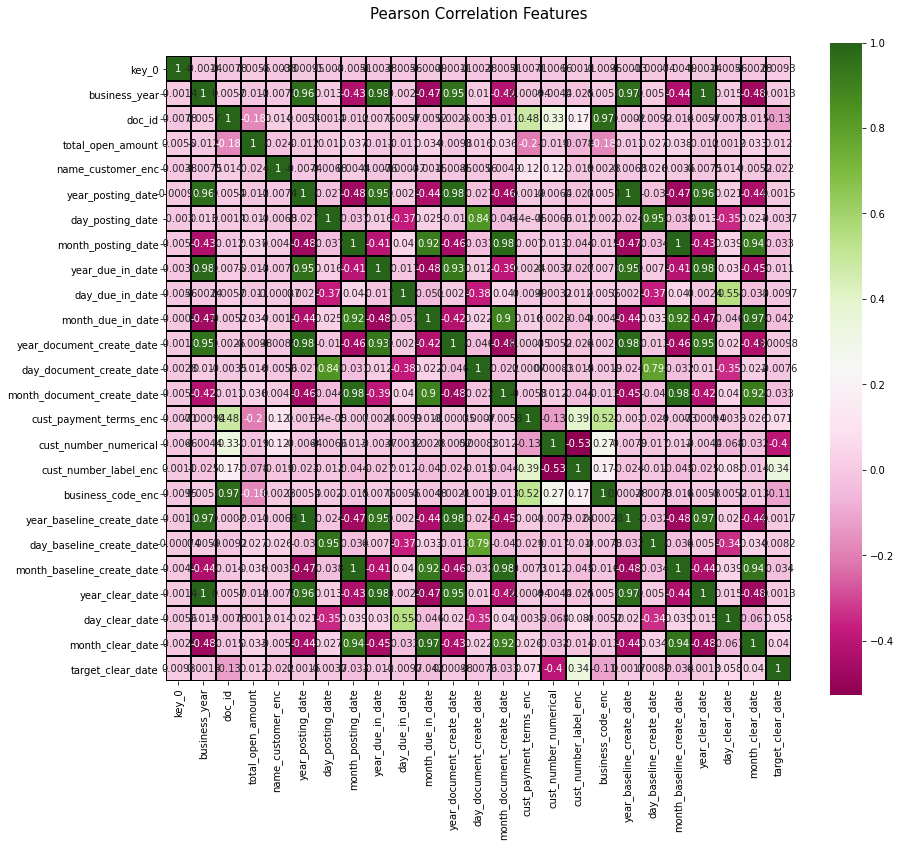

In [86]:
colormap = plt.cm.PiYG
plt.figure(figsize=(14,12))
plt.title("Pearson Correlation Features",y=1.05,size=15)
sns.heatmap(x_train.merge(y_train,on=x_train.index).corr(),linewidths=0.1,vmax=1.0,
           square=True, cmap=colormap, linecolor="black", annot=True)

## MODELLING

## LINEAR REGRESSION MODEL

In [87]:
from sklearn.linear_model import LinearRegression
base_model= LinearRegression()
base_model.fit(x_train,y_train)
print("-----Model Trained------")

-----Model Trained------


In [88]:
y_predict=base_model.predict(x_val)

In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict , squared=False )

0.3082236574312989

In [90]:
pd.DataFrame(zip(y_val,y_predict),columns=["clear_date_predicted","target_clear_date"])

,clear_date_predicted,target_clear_date
0,12.0,12.022449
1,-5.0,-5.030701
2,4.0,4.005680
3,30.0,29.224224
4,0.0,0.011843
...,...,...
7195,2.0,2.025443
7196,-5.0,-5.024806
7197,-1.0,-1.017778
7198,-5.0,-4.351827


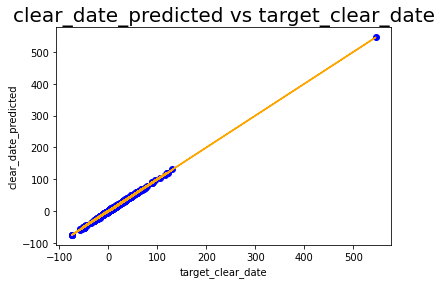

In [91]:
    plt.scatter(x=y_val, y=y_predict, color='blue')
    plt.plot(y_predict,y_val , color='orange')
    plt.title('clear_date_predicted vs target_clear_date', size=20)
    plt.ylabel('clear_date_predicted', size=10)
    plt.xlabel('target_clear_date', size=10)
    plt.show()

## RANDOM FOREST REGRESSOR

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0 , max_depth=4)

In [93]:
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [94]:
predicted = regressor.predict(x_val)

In [95]:
y_pred_test = regressor.predict(x_test)
mean_squared_error(y_test, y_pred_test, squared=False)

8.988290571964137

In [96]:
mean_squared_error(y_val,predicted,squared=False)

12.318931044272649

## THE LOST DATA

In [97]:
main_test

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
2,U001,0100016691,BAY systems,NaT,2020.0,1.930661e+09,2020-03-17,20200317,20200317,2020-04-16,USD,RV,1.0,NaN,15088.00,20200317.0,NAD5,1.930661e+09,1,NaN
6,U001,0200744019,TARG corp,NaT,2020.0,1.930691e+09,2020-03-25,20200324,20200325,2020-04-09,USD,RV,1.0,NaN,18095.01,20200325.0,NAA8,1.930691e+09,1,NaN
13,U001,0200148860,DOLLA systems,NaT,2020.0,1.930828e+09,2020-04-27,20200425,20200427,2020-05-12,USD,RV,1.0,NaN,76485.33,20200427.0,NAA8,1.930828e+09,1,NaN
20,U001,0200762301,C&S WH corporation,NaT,2020.0,1.930757e+09,2020-04-08,20200407,20200408,2020-04-23,USD,RV,1.0,NaN,129096.64,20200408.0,NAC6,1.930757e+09,1,NaN
24,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930644e+09,2020-03-14,20200312,20200314,2020-03-29,USD,RV,1.0,NaN,4671.48,20200314.0,NAH4,1.930644e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,U001,0200771157,WEIS corporation,NaT,2020.0,1.930717e+09,2020-03-28,20200328,20200328,2020-04-12,USD,RV,1.0,NaN,97787.87,20200328.0,NAA8,1.930717e+09,1,NaN
49991,U001,0200794332,COST,NaT,2020.0,1.930567e+09,2020-02-27,20200225,20200227,2020-05-02,USD,RV,1.0,NaN,6883.72,20200227.0,NAGD,1.930567e+09,1,NaN
49992,U001,0200780383,MEIJ associates,NaT,2020.0,1.930689e+09,2020-03-23,20200323,20200323,2020-04-07,USD,RV,1.0,NaN,15008.36,20200323.0,NAA8,1.930689e+09,1,NaN
49996,U001,200770567,LABAT corp,NaT,2020.0,1.930729e+09,2020-04-01,20200401,20200401,2020-04-16,USD,RV,1.0,NaN,66517.95,20200401.0,NAA8,1.930729e+09,1,NaN


In [98]:
main_test.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date               10000
business_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date1        0
due_in_date                  0
invoice_currency             0
document_type                0
posting_id                   0
area_business            10000
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
target_clear_date        10000
dtype: int64

In [99]:
x_main_test= main_test.drop(['area_business'],axis =1)
x_main_test

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
2,U001,0100016691,BAY systems,NaT,2020.0,1.930661e+09,2020-03-17,20200317,20200317,2020-04-16,USD,RV,1.0,15088.00,20200317.0,NAD5,1.930661e+09,1,NaN
6,U001,0200744019,TARG corp,NaT,2020.0,1.930691e+09,2020-03-25,20200324,20200325,2020-04-09,USD,RV,1.0,18095.01,20200325.0,NAA8,1.930691e+09,1,NaN
13,U001,0200148860,DOLLA systems,NaT,2020.0,1.930828e+09,2020-04-27,20200425,20200427,2020-05-12,USD,RV,1.0,76485.33,20200427.0,NAA8,1.930828e+09,1,NaN
20,U001,0200762301,C&S WH corporation,NaT,2020.0,1.930757e+09,2020-04-08,20200407,20200408,2020-04-23,USD,RV,1.0,129096.64,20200408.0,NAC6,1.930757e+09,1,NaN
24,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930644e+09,2020-03-14,20200312,20200314,2020-03-29,USD,RV,1.0,4671.48,20200314.0,NAH4,1.930644e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,U001,0200771157,WEIS corporation,NaT,2020.0,1.930717e+09,2020-03-28,20200328,20200328,2020-04-12,USD,RV,1.0,97787.87,20200328.0,NAA8,1.930717e+09,1,NaN
49991,U001,0200794332,COST,NaT,2020.0,1.930567e+09,2020-02-27,20200225,20200227,2020-05-02,USD,RV,1.0,6883.72,20200227.0,NAGD,1.930567e+09,1,NaN
49992,U001,0200780383,MEIJ associates,NaT,2020.0,1.930689e+09,2020-03-23,20200323,20200323,2020-04-07,USD,RV,1.0,15008.36,20200323.0,NAA8,1.930689e+09,1,NaN
49996,U001,200770567,LABAT corp,NaT,2020.0,1.930729e+09,2020-04-01,20200401,20200401,2020-04-16,USD,RV,1.0,66517.95,20200401.0,NAA8,1.930729e+09,1,NaN


In [100]:
x_main_test= main_test.drop(["target_clear_date","clear_date"],axis =1)
x_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document_type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,0100016691,BAY systems,2020.0,1.930661e+09,2020-03-17,20200317,20200317,2020-04-16,USD,RV,1.0,NaN,15088.00,20200317.0,NAD5,1.930661e+09,1
6,U001,0200744019,TARG corp,2020.0,1.930691e+09,2020-03-25,20200324,20200325,2020-04-09,USD,RV,1.0,NaN,18095.01,20200325.0,NAA8,1.930691e+09,1
13,U001,0200148860,DOLLA systems,2020.0,1.930828e+09,2020-04-27,20200425,20200427,2020-05-12,USD,RV,1.0,NaN,76485.33,20200427.0,NAA8,1.930828e+09,1
20,U001,0200762301,C&S WH corporation,2020.0,1.930757e+09,2020-04-08,20200407,20200408,2020-04-23,USD,RV,1.0,NaN,129096.64,20200408.0,NAC6,1.930757e+09,1
24,U001,0200769623,WAL-MAR foundation,2020.0,1.930644e+09,2020-03-14,20200312,20200314,2020-03-29,USD,RV,1.0,NaN,4671.48,20200314.0,NAH4,1.930644e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,U001,0200771157,WEIS corporation,2020.0,1.930717e+09,2020-03-28,20200328,20200328,2020-04-12,USD,RV,1.0,NaN,97787.87,20200328.0,NAA8,1.930717e+09,1
49991,U001,0200794332,COST,2020.0,1.930567e+09,2020-02-27,20200225,20200227,2020-05-02,USD,RV,1.0,NaN,6883.72,20200227.0,NAGD,1.930567e+09,1
49992,U001,0200780383,MEIJ associates,2020.0,1.930689e+09,2020-03-23,20200323,20200323,2020-04-07,USD,RV,1.0,NaN,15008.36,20200323.0,NAA8,1.930689e+09,1
49996,U001,200770567,LABAT corp,2020.0,1.930729e+09,2020-04-01,20200401,20200401,2020-04-16,USD,RV,1.0,NaN,66517.95,20200401.0,NAA8,1.930729e+09,1


## PREPROCESSING FOR TEST

In [101]:
main_test.drop(["target_clear_date","clear_date"],inplace=True,axis=1)

In [102]:
x_main_test["doc_id"]=x_main_test.doc_id.astype(int)
x_main_test["business_year"]=x_main_test.business_year.astype(int)

In [103]:

x_main_test.drop("area_business",axis=1,inplace=True)

In [104]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2 to 49997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          10000 non-null  object        
 1   cust_number            10000 non-null  object        
 2   name_customer          10000 non-null  object        
 3   business_year          10000 non-null  int32         
 4   doc_id                 10000 non-null  int32         
 5   posting_date           10000 non-null  object        
 6   document_create_date   10000 non-null  int64         
 7   document_create_date1  10000 non-null  int64         
 8   due_in_date            10000 non-null  datetime64[ns]
 9   invoice_currency       10000 non-null  object        
 10  document_type          10000 non-null  object        
 11  posting_id             10000 non-null  float64       
 12  total_open_amount      10000 non-null  float64       
 13  b

In [105]:
x_main_test.drop("invoice_id",axis=1,inplace=True) #removing invoice id

In [106]:
x_main_test.drop("document_create_date1",axis=1,inplace=True) #removing 

In [107]:
x_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
2,U001,0100016691,BAY systems,2020,1930660986,2020-03-17,20200317,2020-04-16,USD,RV,1.0,15088.00,20200317.0,NAD5,1
6,U001,0200744019,TARG corp,2020,1930690546,2020-03-25,20200324,2020-04-09,USD,RV,1.0,18095.01,20200325.0,NAA8,1
13,U001,0200148860,DOLLA systems,2020,1930827544,2020-04-27,20200425,2020-05-12,USD,RV,1.0,76485.33,20200427.0,NAA8,1
20,U001,0200762301,C&S WH corporation,2020,1930756895,2020-04-08,20200407,2020-04-23,USD,RV,1.0,129096.64,20200408.0,NAC6,1
24,U001,0200769623,WAL-MAR foundation,2020,1930643616,2020-03-14,20200312,2020-03-29,USD,RV,1.0,4671.48,20200314.0,NAH4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,U001,0200771157,WEIS corporation,2020,1930716522,2020-03-28,20200328,2020-04-12,USD,RV,1.0,97787.87,20200328.0,NAA8,1
49991,U001,0200794332,COST,2020,1930566819,2020-02-27,20200225,2020-05-02,USD,RV,1.0,6883.72,20200227.0,NAGD,1
49992,U001,0200780383,MEIJ associates,2020,1930689484,2020-03-23,20200323,2020-04-07,USD,RV,1.0,15008.36,20200323.0,NAA8,1
49996,U001,200770567,LABAT corp,2020,1930729444,2020-04-01,20200401,2020-04-16,USD,RV,1.0,66517.95,20200401.0,NAA8,1


In [108]:
##change datetime to int
x_main_test["posting_date"]= pd.to_datetime(x_main_test["posting_date"])
x_main_test["document_create_date"]= pd.to_datetime(x_main_test.document_create_date,format='%Y%m%d')
x_main_test["baseline_create_date"]= pd.to_datetime(x_main_test.baseline_create_date,format='%Y%m%d')

In [109]:
x_main_test.sort_values(by=["posting_date"],inplace=True)

In [110]:
x_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
27411,U001,0200472708,WEST P in,2020,1930578661,2020-02-27,2020-02-27,2020-03-08,USD,RV,1.0,24418.75,2020-02-27,NA10,1
20558,U001,0200847305,CUSTOM,2020,1930570551,2020-02-27,2020-02-26,2020-03-08,USD,RV,1.0,71826.75,2020-02-27,NA10,1
5025,U001,0200769623,WAL-MAR us,2020,1930577109,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,47084.35,2020-02-27,NAH4,1
33690,U001,0200726979,BJ'S systems,2020,1930576123,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,67.29,2020-02-27,NAA8,1
28342,U001,CCU013,KRAFT F corporation,2020,1930570505,2020-02-27,2020-02-26,2020-02-27,USD,RV,1.0,7329.58,2020-02-27,NAX2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48588,U001,0100000222,SMITHFIE trust,2020,1930882925,2020-05-14,2020-05-09,2020-05-29,USD,RV,1.0,9079.22,2020-05-14,NAA8,1
37250,U001,100049962,MARKPOL us,2020,1930906373,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,19173.65,2020-05-15,NAA8,1
34660,U001,0200742344,MAINES systems,2020,1930914868,2020-05-18,2020-05-18,2020-06-02,USD,RV,1.0,20756.50,2020-05-18,NAA8,1
24236,U001,0200780383,MEIJ corporation,2020,1930920778,2020-05-20,2020-05-20,2020-06-04,USD,RV,1.0,1667.74,2020-05-20,NAA8,1


In [111]:
x_main_test.business_code.value_counts()

U001    9175
CA02     724
U013      73
U002      23
U005       5
Name: business_code, dtype: int64

In [112]:
x_main_test["business_code"]= np.where(x_main_test["business_code"].isin(["U013","U005","U002"]),"Others",x_main_test["business_code"])

In [113]:
x_main_test.business_code.value_counts()

U001      9175
CA02       724
Others     101
Name: business_code, dtype: int64

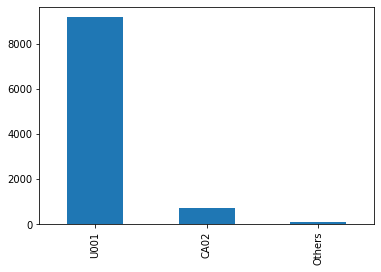

In [114]:
x_main_test['business_code'].value_counts().plot(kind='bar')
plt.show()

In [115]:
x_main_test.posting_id.value_counts()

1.0    10000
Name: posting_id, dtype: int64

In [116]:
## posting id has same value for all 10000 data 
x_main_test.drop("posting_id",axis=1,inplace=True)

In [117]:
x_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
27411,U001,0200472708,WEST P in,2020,1930578661,2020-02-27,2020-02-27,2020-03-08,USD,RV,24418.75,2020-02-27,NA10,1
20558,U001,0200847305,CUSTOM,2020,1930570551,2020-02-27,2020-02-26,2020-03-08,USD,RV,71826.75,2020-02-27,NA10,1
5025,U001,0200769623,WAL-MAR us,2020,1930577109,2020-02-27,2020-02-27,2020-03-13,USD,RV,47084.35,2020-02-27,NAH4,1
33690,U001,0200726979,BJ'S systems,2020,1930576123,2020-02-27,2020-02-26,2020-03-13,USD,RV,67.29,2020-02-27,NAA8,1
28342,U001,CCU013,KRAFT F corporation,2020,1930570505,2020-02-27,2020-02-26,2020-02-27,USD,RV,7329.58,2020-02-27,NAX2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48588,U001,0100000222,SMITHFIE trust,2020,1930882925,2020-05-14,2020-05-09,2020-05-29,USD,RV,9079.22,2020-05-14,NAA8,1
37250,U001,100049962,MARKPOL us,2020,1930906373,2020-05-15,2020-05-15,2020-05-30,USD,RV,19173.65,2020-05-15,NAA8,1
34660,U001,0200742344,MAINES systems,2020,1930914868,2020-05-18,2020-05-18,2020-06-02,USD,RV,20756.50,2020-05-18,NAA8,1
24236,U001,0200780383,MEIJ corporation,2020,1930920778,2020-05-20,2020-05-20,2020-06-04,USD,RV,1667.74,2020-05-20,NAA8,1


Text(0, 0.5, 'number of customer')

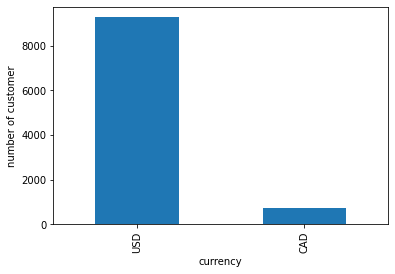

In [118]:
fig = x_main_test["invoice_currency"].value_counts().plot.bar()
plt.xlabel("currency")
plt.ylabel("number of customer")

Text(0, 0.5, 'Number of customers')

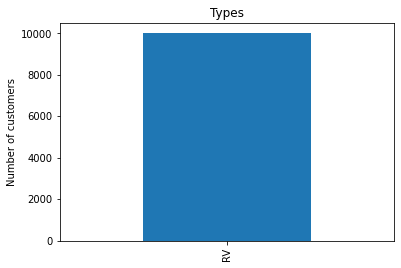

In [119]:
fig =x_main_test["document_type"].value_counts().plot.bar()
fig.set_title("Types")
fig.set_ylabel("Number of customers")

In [120]:
## document type have only RV values so drop it
x_main_test.drop("document_type",axis=1,inplace=True)

In [121]:
x_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
27411,U001,0200472708,WEST P in,2020,1930578661,2020-02-27,2020-02-27,2020-03-08,USD,24418.75,2020-02-27,NA10,1
20558,U001,0200847305,CUSTOM,2020,1930570551,2020-02-27,2020-02-26,2020-03-08,USD,71826.75,2020-02-27,NA10,1
5025,U001,0200769623,WAL-MAR us,2020,1930577109,2020-02-27,2020-02-27,2020-03-13,USD,47084.35,2020-02-27,NAH4,1
33690,U001,0200726979,BJ'S systems,2020,1930576123,2020-02-27,2020-02-26,2020-03-13,USD,67.29,2020-02-27,NAA8,1
28342,U001,CCU013,KRAFT F corporation,2020,1930570505,2020-02-27,2020-02-26,2020-02-27,USD,7329.58,2020-02-27,NAX2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48588,U001,0100000222,SMITHFIE trust,2020,1930882925,2020-05-14,2020-05-09,2020-05-29,USD,9079.22,2020-05-14,NAA8,1
37250,U001,100049962,MARKPOL us,2020,1930906373,2020-05-15,2020-05-15,2020-05-30,USD,19173.65,2020-05-15,NAA8,1
34660,U001,0200742344,MAINES systems,2020,1930914868,2020-05-18,2020-05-18,2020-06-02,USD,20756.50,2020-05-18,NAA8,1
24236,U001,0200780383,MEIJ corporation,2020,1930920778,2020-05-20,2020-05-20,2020-06-04,USD,1667.74,2020-05-20,NAA8,1


In [122]:
x_main_test.isOpen.value_counts()

1    10000
Name: isOpen, dtype: int64

In [123]:
x_main_test.drop("isOpen",axis=1,inplace=True)

In [124]:
x_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
27411,U001,0200472708,WEST P in,2020,1930578661,2020-02-27,2020-02-27,2020-03-08,USD,24418.75,2020-02-27,NA10
20558,U001,0200847305,CUSTOM,2020,1930570551,2020-02-27,2020-02-26,2020-03-08,USD,71826.75,2020-02-27,NA10
5025,U001,0200769623,WAL-MAR us,2020,1930577109,2020-02-27,2020-02-27,2020-03-13,USD,47084.35,2020-02-27,NAH4
33690,U001,0200726979,BJ'S systems,2020,1930576123,2020-02-27,2020-02-26,2020-03-13,USD,67.29,2020-02-27,NAA8
28342,U001,CCU013,KRAFT F corporation,2020,1930570505,2020-02-27,2020-02-26,2020-02-27,USD,7329.58,2020-02-27,NAX2
...,...,...,...,...,...,...,...,...,...,...,...,...
48588,U001,0100000222,SMITHFIE trust,2020,1930882925,2020-05-14,2020-05-09,2020-05-29,USD,9079.22,2020-05-14,NAA8
37250,U001,100049962,MARKPOL us,2020,1930906373,2020-05-15,2020-05-15,2020-05-30,USD,19173.65,2020-05-15,NAA8
34660,U001,0200742344,MAINES systems,2020,1930914868,2020-05-18,2020-05-18,2020-06-02,USD,20756.50,2020-05-18,NAA8
24236,U001,0200780383,MEIJ corporation,2020,1930920778,2020-05-20,2020-05-20,2020-06-04,USD,1667.74,2020-05-20,NAA8


In [125]:
# IN BUSINESS CODE U STANDS FOR USD AND C FOR CAD remove invoice currency
x_main_test.drop("invoice_currency",axis=1,inplace=True)

In [126]:
x_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
27411,U001,0200472708,WEST P in,2020,1930578661,2020-02-27,2020-02-27,2020-03-08,24418.75,2020-02-27,NA10
20558,U001,0200847305,CUSTOM,2020,1930570551,2020-02-27,2020-02-26,2020-03-08,71826.75,2020-02-27,NA10
5025,U001,0200769623,WAL-MAR us,2020,1930577109,2020-02-27,2020-02-27,2020-03-13,47084.35,2020-02-27,NAH4
33690,U001,0200726979,BJ'S systems,2020,1930576123,2020-02-27,2020-02-26,2020-03-13,67.29,2020-02-27,NAA8
28342,U001,CCU013,KRAFT F corporation,2020,1930570505,2020-02-27,2020-02-26,2020-02-27,7329.58,2020-02-27,NAX2
...,...,...,...,...,...,...,...,...,...,...,...
48588,U001,0100000222,SMITHFIE trust,2020,1930882925,2020-05-14,2020-05-09,2020-05-29,9079.22,2020-05-14,NAA8
37250,U001,100049962,MARKPOL us,2020,1930906373,2020-05-15,2020-05-15,2020-05-30,19173.65,2020-05-15,NAA8
34660,U001,0200742344,MAINES systems,2020,1930914868,2020-05-18,2020-05-18,2020-06-02,20756.50,2020-05-18,NAA8
24236,U001,0200780383,MEIJ corporation,2020,1930920778,2020-05-20,2020-05-20,2020-06-04,1667.74,2020-05-20,NAA8


In [127]:
##  LABEL ENCODER :-)

In [128]:
name_customer_enc = LabelEncoder()
name_customer_enc.fit(x_main_test["name_customer"])
x_main_test["name_customer_enc"]=name_customer_enc.transform(x_main_test["name_customer"])

In [129]:
x_main_test.drop(["name_customer"],inplace=True,axis=1)

In [130]:
def shot(col , traindf = x_main_test):
    traindf.drop(col,inplace=True,axis=1)
    return traindf

In [131]:
x_main_test["year_posting_date"]= x_main_test["posting_date"].dt.year
x_main_test["day_posting_date"]= x_main_test["posting_date"].dt.day
x_main_test["month_posting_date"]= x_main_test["posting_date"].dt.month

x_main_test["year_due_in_date"]= x_main_test["due_in_date"].dt.year
x_main_test["day_due_in_date"]= x_main_test["due_in_date"].dt.day
x_main_test["month_due_in_date"]= x_main_test["due_in_date"].dt.month

x_main_test["year_document_create_date"]= x_main_test["document_create_date"].dt.year
x_main_test["day_document_create_date"]= x_main_test["document_create_date"].dt.day
x_main_test["month_document_create_date"]= x_main_test["document_create_date"].dt.month


In [132]:
x_main_test = shot(["document_create_date"])
x_main_test = shot(["due_in_date"])
x_main_test = shot(["posting_date"])

In [133]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(x_main_test["cust_payment_terms"])
x_main_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(x_main_test["cust_payment_terms"])

In [134]:
x_main_test= shot(["cust_payment_terms"])

In [135]:
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [136]:
x_main_test[mixed_num_in_cust_num]=x_main_test[mixed_cust_num].str.extract('(\d+)')

In [137]:
x_main_test[mixed_label_in_cust_num]=x_main_test[mixed_cust_num].str[:3]

In [138]:
x_main_test["cust_number_numerical"]=x_main_test.cust_number_numerical.astype(int)

In [139]:
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(x_main_test["cust_number_label"])
x_main_test["cust_number_label_enc"]=cust_number_label_enc.transform(x_main_test["cust_number_label"])

In [140]:
x_main_test = shot(["cust_number"])
x_main_test = shot(["cust_number_label"])

In [141]:
business_code_enc = LabelEncoder()
business_code_enc.fit(x_main_test["business_code"])
x_main_test["business_code_enc"]=business_code_enc.transform(x_main_test["business_code"])

In [142]:
x_main_test = shot(["business_code"])

In [143]:
x_main_test["year_baseline_create_date"]= x_main_test["baseline_create_date"].dt.year
x_main_test["day_baseline_create_date"]= x_main_test["baseline_create_date"].dt.day
x_main_test["month_baseline_create_date"]= x_main_test["baseline_create_date"].dt.month

In [144]:
x_main_test = shot(["baseline_create_date"])

In [145]:
x_main_test.columns

Index(['business_year', 'doc_id', 'total_open_amount', 'name_customer_enc',
       'year_posting_date', 'day_posting_date', 'month_posting_date',
       'year_due_in_date', 'day_due_in_date', 'month_due_in_date',
       'year_document_create_date', 'day_document_create_date',
       'month_document_create_date', 'cust_payment_terms_enc',
       'cust_number_numerical', 'cust_number_label_enc', 'business_code_enc',
       'year_baseline_create_date', 'day_baseline_create_date',
       'month_baseline_create_date'],
      dtype='object')

In [146]:
## clear date should be removed from x_train because thereis no null values in x_main _test
x_train.drop('day_clear_date',axis=1,inplace=True)

In [147]:
x_train.drop('month_clear_date',axis=1,inplace=True)

In [148]:
x_train.drop('year_clear_date',axis=1,inplace=True)

In [149]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 27411 to 4827
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_year               10000 non-null  int32  
 1   doc_id                      10000 non-null  int32  
 2   total_open_amount           10000 non-null  float64
 3   name_customer_enc           10000 non-null  int32  
 4   year_posting_date           10000 non-null  int64  
 5   day_posting_date            10000 non-null  int64  
 6   month_posting_date          10000 non-null  int64  
 7   year_due_in_date            10000 non-null  int64  
 8   day_due_in_date             10000 non-null  int64  
 9   month_due_in_date           10000 non-null  int64  
 10  year_document_create_date   10000 non-null  int64  
 11  day_document_create_date    10000 non-null  int64  
 12  month_document_create_date  10000 non-null  int64  
 13  cust_payment_terms_enc      

In [150]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34978
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_year               28000 non-null  int32  
 1   doc_id                      28000 non-null  int32  
 2   total_open_amount           28000 non-null  float64
 3   name_customer_enc           28000 non-null  int32  
 4   year_posting_date           28000 non-null  int64  
 5   day_posting_date            28000 non-null  int64  
 6   month_posting_date          28000 non-null  int64  
 7   year_due_in_date            28000 non-null  int64  
 8   day_due_in_date             28000 non-null  int64  
 9   month_due_in_date           28000 non-null  int64  
 10  year_document_create_date   28000 non-null  int64  
 11  day_document_create_date    28000 non-null  int64  
 12  month_document_create_date  28000 non-null  int64  
 13  cust_payment_terms_enc      280

In [151]:
model=RandomForestRegressor()

In [152]:
model.fit(x_train, y_train)

predicted  =   regressor.predict(x_val) # starting to predict

#Checking the accuracy
main_model_accuracy = round(model.score(x_train, y_train)*100,2)
print(round(main_model_accuracy,2),'%')

93.14 %


In [153]:
real_time_data = model.predict(x_main_test)

## BUCKET LIST

In [154]:
def Mapping(x):
    temp = []
    for i in list(x):
        if i < 0:
            temp.append("befor due")
   
        elif i==0:
            temp.append(" ON due ")
        else :
            temp.append(" after due ")
    return temp

col = Mapping(real_time_data)
bucket = pd.DataFrame()
bucket['Predictions'] = real_time_data
bucket['Bucket_list'] = col
bucket.head()

,Predictions,Bucket_list
0,-1.17,befor due
1,-2.64,befor due
2,0.36,after due
3,15.57,after due
4,54.81,after due


In [155]:
bucket

,Predictions,Bucket_list
0,-1.17,befor due
1,-2.64,befor due
2,0.36,after due
3,15.57,after due
4,54.81,after due
...,...,...
9995,-0.95,befor due
9996,1.22,after due
9997,-4.29,befor due
9998,-6.42,befor due
